# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import copy

# Reading the data

In [3]:
test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')
sample = pd.read_csv('sample.csv')

In [4]:
train.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [5]:
test.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,15003,VENDOR-2513,GL-6050310,56.13,Travel and Entertainment Miscellaneous Company...
1,15008,VENDOR-1044,GL-6101400,96.56,Final Site Clean Up Store Construction Advance...
2,15013,VENDOR-1254,GL-6101400,55.93,Arabian American Development Co Final Site Cle...
3,15019,VENDOR-1331,GL-2182000,32.62,Corporate Services Contingent Labor/Temp Labor...
4,15020,VENDOR-2513,GL-6050310,25.81,Fortune National Corp Miscellaneous Company Ca...


# Variable Identification

In [6]:
train.dtypes

Inv_Id                int64
Vendor_Code          object
GL_Code              object
Inv_Amt             float64
Item_Description     object
Product_Category     object
dtype: object

In [7]:
test.dtypes

Inv_Id                int64
Vendor_Code          object
GL_Code              object
Inv_Amt             float64
Item_Description     object
dtype: object

In [8]:
train.shape, test.shape

((5566, 6), (2446, 5))

# Continuous Variable

In [9]:
test.describe()

,Inv_Id,Inv_Amt
count,2446.000000,2446.000000
mean,18996.744481,49.449321
std,2327.955920,28.593046
min,15003.000000,0.040000
25%,16985.500000,25.395000
50%,18990.500000,49.230000
75%,21035.500000,73.327500
max,23011.000000,99.940000


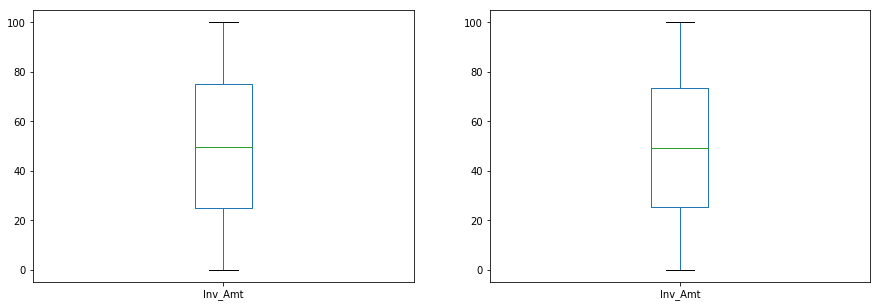

In [10]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
train['Inv_Amt'].plot.box(ax=axarr[0])
test['Inv_Amt'].plot.box(ax=axarr[1])

In [11]:
Q1_Amt_test = test['Inv_Amt'].quantile(0.25)
Q3_Amt_test = test['Inv_Amt'].quantile(0.75)
IQR_Amt_test = Q3_Amt_test - Q1_Amt_test
upper_Amt_test = Q3_Amt_test + 1.5 * IQR_Amt_test
lower_Amt_test = Q1_Amt_test - 1.5 * IQR_Amt_test
upper_Amt_test, lower_Amt_test

(145.22625, -46.50375000000001)

In [12]:
Q1_Amt_train = train['Inv_Amt'].quantile(0.25)
Q3_Amt_train = train['Inv_Amt'].quantile(0.75)
IQR_Amt_train = Q3_Amt_train - Q1_Amt_train
upper_Amt_train = Q3_Amt_train + 1.5 * IQR_Amt_train
lower_Amt_train = Q1_Amt_train - 1.5 * IQR_Amt_train
upper_Amt_train, lower_Amt_train

(150.48875, -50.36125000000001)

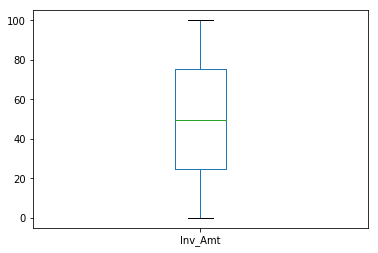

In [13]:
train.loc[train['Inv_Amt'] > upper_Amt_train ,'Inv_Amt'] = np.mean(train['Inv_Amt'])
train.loc[train['Inv_Amt'] < lower_Amt_train ,'Inv_Amt'] = np.mean(train['Inv_Amt'])
train['Inv_Amt'].plot.box()

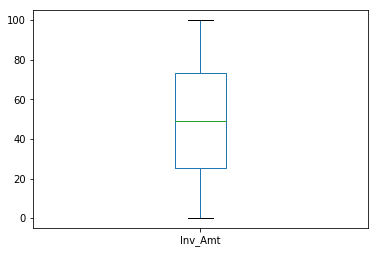

In [14]:
test.loc[test['Inv_Amt'] > upper_Amt_test ,'Inv_Amt'] = np.mean(test['Inv_Amt'])
test.loc[test['Inv_Amt'] < lower_Amt_test ,'Inv_Amt'] = np.mean(test['Inv_Amt'])
test['Inv_Amt'].plot.box()

In [15]:
test['Inv_Amt'].describe()

count    2446.000000
mean       49.449321
std        28.593046
min         0.040000
25%        25.395000
50%        49.230000
75%        73.327500
max        99.940000
Name: Inv_Amt, dtype: float64

In [16]:
train.isnull().sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64

In [17]:
test.isnull().sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
dtype: int64

# Categorical Data

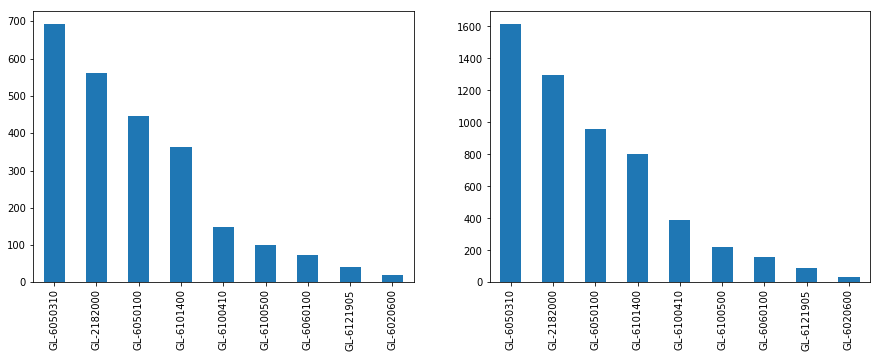

In [18]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['GL_Code'].value_counts().plot.bar(ax=axarr[0])
train['GL_Code'].value_counts().plot.bar(ax=axarr[1])

In [19]:
train['Product_Category'].value_counts().count()

36

In [20]:
c = pd.crosstab(train['Product_Category'],train['GL_Code'])
c

GL_Code,GL-2182000,GL-6020600,GL-6050100,GL-6050310,GL-6060100,GL-6100410,GL-6100500,GL-6101400,GL-6121905
Product_Category,,,,,,,,,
CLASS-1248,5,0,0,0,0,0,0,0,0
CLASS-1249,176,0,0,0,0,0,0,0,0
CLASS-1250,451,0,0,0,0,0,0,0,0
CLASS-1274,0,0,946,0,40,0,0,0,0
CLASS-1294,25,0,0,0,0,0,0,0,0
CLASS-1309,0,0,0,0,0,0,32,0,0
CLASS-1322,0,28,0,0,0,0,0,0,0
CLASS-1376,365,0,0,0,0,0,0,0,0
CLASS-1429,0,0,0,0,0,32,0,0,0


In [21]:
from scipy.stats import chi2_contingency
chi2_contingency(c)

(39129.798132297925,
 0.0,
 280,
 array([[1.16510959e+00, 2.87459576e-02, 8.64175350e-01, 1.45346748e+00,
         1.41933166e-01, 3.48544736e-01, 1.97628458e-01, 7.20445562e-01,
         7.99496946e-02],
        [4.10118577e+01, 1.01185771e+00, 3.04189723e+01, 5.11620553e+01,
         4.99604743e+00, 1.22687747e+01, 6.95652174e+00, 2.53596838e+01,
         2.81422925e+00],
        [1.05092885e+02, 2.59288538e+00, 7.79486166e+01, 1.31102767e+02,
         1.28023715e+01, 3.14387352e+01, 1.78260870e+01, 6.49841897e+01,
         7.21146245e+00],
        [2.29759612e+02, 5.66870284e+00, 1.70415379e+02, 2.86623787e+02,
         2.79892203e+01, 6.87330219e+01, 3.89723320e+01, 1.42071865e+02,
         1.57660798e+01],
        [5.82554797e+00, 1.43729788e-01, 4.32087675e+00, 7.26733741e+00,
         7.09665828e-01, 1.74272368e+00, 9.88142292e-01, 3.60222781e+00,
         3.99748473e-01],
        [7.45670140e+00, 1.83974129e-01, 5.53072224e+00, 9.30219188e+00,
         9.08372260e-01, 2.2306863

In [22]:
train['Vendor_Code'].value_counts().count()

1253

In [23]:
train.groupby('GL_Code')['Inv_Amt'].mean()

GL_Code
GL-2182000    50.911789
GL-6020600    45.122188
GL-6050100    50.347817
GL-6050310    49.634623
GL-6060100    51.819177
GL-6100410    49.375567
GL-6100500    51.789955
GL-6101400    48.354800
GL-6121905    50.001236
Name: Inv_Amt, dtype: float64

# Building Training and Testing Model

In [24]:
clf = DecisionTreeClassifier()

In [25]:
x_train = train.drop(['Product_Category','Inv_Id'],axis=1)
y_train = train['Product_Category']

x_test = test.drop('Inv_Id',axis=1)
y_test = sample['Product_Category']

In [26]:
X_train_hash = copy.copy(x_train)
X_test_hash = copy.copy(x_test)
for i in range(X_train_hash.shape[1]):
    X_train_hash.iloc[:,i]=X_train_hash.iloc[:,i].astype('str')
for i in range(X_test_hash.shape[1]):
    X_test_hash.iloc[:,i]=X_test_hash.iloc[:,i].astype('str')

In [27]:
hashing = FeatureHasher(n_features=1048576+1048576, input_type="string")
x_train = hashing.transform(X_train_hash.values)
x_test = hashing.transform(X_test_hash.values)

In [28]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
predict_test = clf.predict(x_test)

# Model Deployment

In [30]:
sample['Inv_Id'] = test['Inv_Id']
sample.fillna('CLASS-784',axis=1).head()

,Inv_Id,Product_Category
0,15003,CLASS-1758
1,15008,CLASS-1522
2,15013,CLASS-1522
3,15019,CLASS-1376
4,15020,CLASS-1758


In [31]:
sample['Product_Category'] = predict_test
sample.to_csv('sample.csv', header=True, index=False)
sample.head()

,Inv_Id,Product_Category
0,15003,CLASS-1758
1,15008,CLASS-1522
2,15013,CLASS-1522
3,15019,CLASS-1376
4,15020,CLASS-1758


# Calculating various metrics

In [32]:
clf.score(x_train,y_train), clf.score(x_test, predict_test)

(1.0, 1.0)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
classify = classification_report(y_test, predict_test)
confusion = confusion_matrix(y_test, predict_test)

In [34]:
file1 = open("classification report.txt","w+") 
file1.write(classify)

1892

In [35]:
np.savetxt('confusion matrix.txt',confusion)

In [36]:
accuracy_score(y_test, predict_test)

1.0